# Explore here

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

df = pd.read_csv(url)

# Mostrar las primeras 5 filas
print(df.head())

print(df.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

PASO 2

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [7]:
X = df.drop("MedHouseVal", axis=1)


In [8]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [9]:
# Entrenar K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)


,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [11]:

# Agregar columna 'Cluster' como categoría
df["Cluster"] = pd.Series(kmeans.labels_, dtype="category")

# Verificar resultado
print(df["Cluster"].value_counts())
print(df.head())


Cluster
0    8363
2    4571
4    3810
3    2759
1    1064
5      73
Name: count, dtype: int64
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal Cluster  
0    -122.23        4.526       4  
1    -122.22        3.585       2  
2    -122.24        3.521       4  
3    -122.25        3.413       4  
4    -122.25        3.422       4  


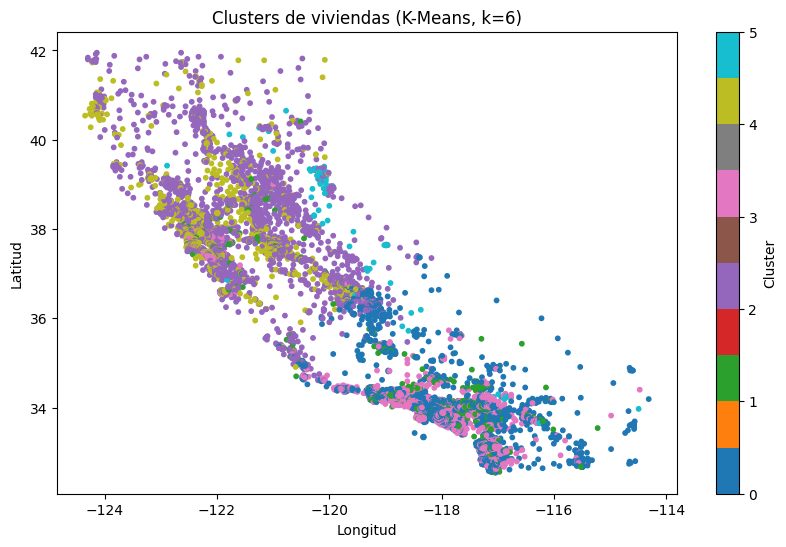

In [12]:
#Graficar clusters en mapa (usando latitud y longitud)
plt.figure(figsize=(10,6))
plt.scatter(df["Longitude"], df["Latitude"], c=df["Cluster"].cat.codes, cmap="tab10", s=10)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Clusters de viviendas (K-Means, k=6)")
plt.colorbar(label="Cluster")
plt.show()

PASO 3:

In [13]:
from sklearn.model_selection import train_test_split

# Dividir datos (usamos los datos escalados)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Entrenar K-Means con los datos de entrenamiento
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)


,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


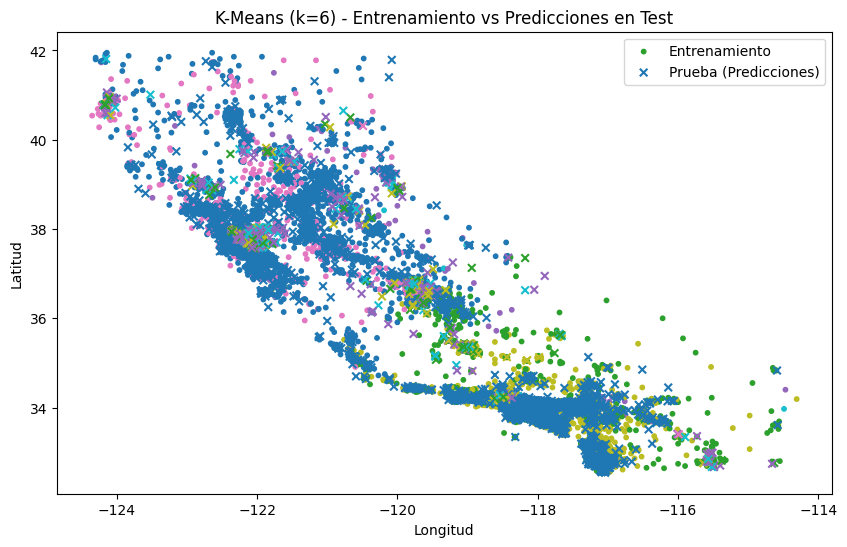

In [14]:
# Predecir en el conjunto de prueba
y_pred_test = kmeans.predict(X_test)

# Para graficar, necesitamos también las coordenadas originales
# Por eso dividimos df para obtener sus latitudes y longitudes correspondientes
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Agregar predicciones al df_test
df_test = df_test.copy()
df_test["Cluster_Pred"] = pd.Series(y_pred_test, dtype="category")

# Graficar
plt.figure(figsize=(10,6))

# Datos de entrenamiento
plt.scatter(df_train["Longitude"], df_train["Latitude"], 
            c=kmeans.labels_, cmap="tab10", s=10, label="Entrenamiento")

# Datos de prueba (predichos)
plt.scatter(df_test["Longitude"], df_test["Latitude"], 
            c=df_test["Cluster_Pred"].cat.codes, cmap="tab10", 
            s=30, marker="x", label="Prueba (Predicciones)")

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("K-Means (k=6) - Entrenamiento vs Predicciones en Test")
plt.legend()
plt.show()

PASO 4:

In [15]:
#Preparar los datos
from sklearn.model_selection import train_test_split

# Volvemos a crear X y y
X = df.drop(["MedHouseVal", "Cluster"], axis=1)  # variables predictoras
y = df["Cluster"].cat.codes  # etiquetas numéricas de los clusters

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1718
           1       0.98      0.90      0.94       221
           2       0.98      0.97      0.98       873
           3       0.97      0.97      0.97       529
           4       0.97      0.99      0.98       773
           5       1.00      0.86      0.92        14

    accuracy                           0.98      4128
   macro avg       0.98      0.95      0.96      4128
weighted avg       0.98      0.98      0.98      4128



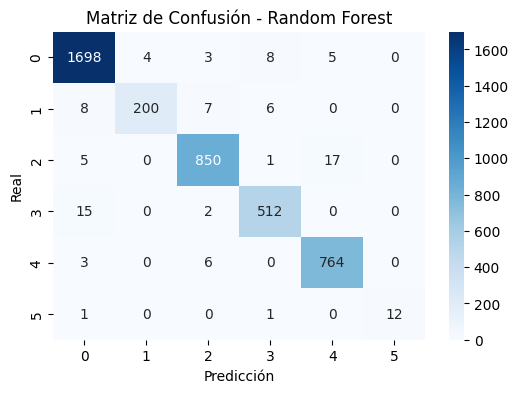

In [20]:
#Entrenar el modelo supervisado
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = rf_model.predict(X_test)

# Reporte de métricas
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

PASO 5:

In [22]:
import joblib
import os

# Crear carpeta para modelos si no existe
os.makedirs("modelos", exist_ok=True)

# Guardar K-Means
joblib.dump(kmeans, "modelos/kmeans_model.pkl")

# Guardar Random Forest
joblib.dump(rf_model, "modelos/random_forest_model.pkl")

print("✅ Modelos guardados en la carpeta'modelos'")

✅ Modelos guardados en la carpeta'modelos'
